<a href="https://colab.research.google.com/github/riya3680/coursera-test/blob/main/Diab_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import pandas as pd
import os

#os.chdir('/Users/stevenhurwitt/Documents/Blog/Classification')
data = pd.read_csv('/content/Data_f1.csv', sep=',', header=0)
data.head()


X = data.iloc[:,:15]
Y = data.iloc[:,16]

In [193]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, test_size=0.20, random_state=20)


In [114]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#Xtrain=sc.fit_transform(Xtrain)
#Xtest=sc.transform(Xtest)

In [119]:
#RANDOM FOREST CLASSIFIER
#from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier()

In [137]:
#ADA BOOST
#from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()

In [159]:
#LOGISTIC REGRESSION
#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression()


In [150]:
#SVc,SVM
#from sklearn.svm import SVC
#model=SVC(kernel='rbf',random_state=4)


In [203]:
#STOCHASTIC GRADIANT DESCENT- CLASSIFICATION
#from sklearn.linear_model import SGDClassifier
#model=SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [71]:
#GAUSSIAN NAIVE BAYES
#from sklearn.naive_bayes import GaussianNB          #PROBLEM
#gnb = GaussianNB()
#model=gnb.fit(Xtrain, Ytrain).predict(Xtest)

In [170]:
#NN CLASSIFICATION
#from sklearn.neural_network import MLPClassifier
#model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


In [210]:
#XG BOOST
from xgboost import XGBClassifier
model = XGBClassifier()

In [184]:
#DECISION TREE CLASSIFICATION
#from sklearn import tree
#model=tree.DecisionTreeClassifier()

In [194]:
#KNN
#from sklearn.neighbors import KNeighborsClassifier
#model= KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)

In [211]:

x=model.fit(Xtrain, Ytrain)
print("The model accuracy is :", model.score(Xtest,Ytest)*100, '%')
score = model.score(Xtest, Ytest)
print(score)


The model accuracy is : 82.6923076923077 %
0.8269230769230769


confusion matrix

In [212]:
Predictions=model.predict(Xtest)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Ytest, Predictions)
print(cm)

[[81  7]
 [11  5]]


In [214]:
#accuracy
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print(accuracy)

0.8269230769230769


In [215]:
#specificity
specificity=(cm[1,1]/(cm[1,0]+cm[1,1])*100)
print("specificity:",specificity)

specificity: 31.25


In [216]:
#sensitivity
sensitivity=(cm[0,0]/(cm[0,0]+cm[0,1])*100)
print("sensitivity: ",sensitivity)

sensitivity:  92.04545454545455


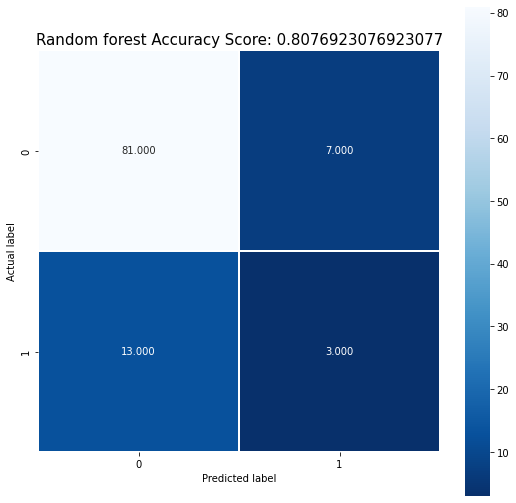

In [143]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random forest Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [217]:
#time taken
import time
start = time.time_ns()
#RANDOM FOREST CLASSIFIER
#from sklearn.ensemble import RandomForestClassifier
model.fit(Xtrain, Ytrain)
#score = model.score(Xtest, Ytest)

end = time.time_ns()
x=((end-start)/1000000)
#print(start/1000000)
#print(end)
print(end-start)
print(x,"ms")

32247488
32.247488 ms


In [191]:

print("acuracy: ",accuracy)
print("sensitivity: ",sensitivity)
print("specificity:",specificity)
print("time taken: ", x ,"ms")
print("confusion matrix: " ,cm)

acuracy:  0.8846153846153846
sensitivity:  93.18181818181817
specificity: 62.5
time taken:  3.30195 ms
confusion matrix:  [[82  6]
 [ 6 10]]


ROC CURVE AND AUC

roc-Y-TP rate X-FP rate...
roc return 3 things- tp rate,fp rate ,threshold

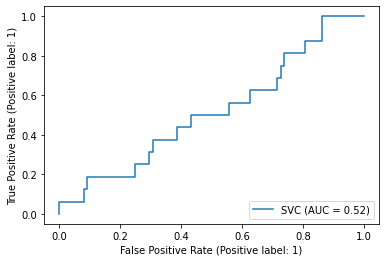

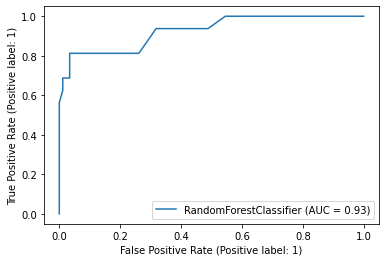

In [157]:
#roc auc - random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
model=RandomForestClassifier()
x=model.fit(Xtrain, Ytrain)
svc = SVC(random_state=10)
svc.fit(Xtrain, Ytrain)
svc_disp=RocCurveDisplay.from_estimator(svc,Xtest,Ytest)

rfc=RandomForestClassifier(random_state=10)
rfc.fit(Xtrain, Ytrain)
rfc_disp=RocCurveDisplay.from_estimator(rfc,Xtest,Ytest)
plt.show()

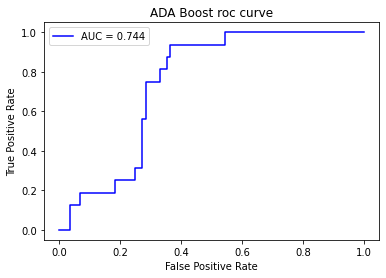

In [145]:
#roc for ada boost
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
x=model.fit(Xtrain, Ytrain)

import sklearn.metrics as metrics
probs = model.predict_proba(Xtest)
preds = probs[:,1]
#print(len(preds)
ada_fpr, ada_tpr, threshold = metrics.roc_curve(Ytest, preds)
ada_auc = metrics.auc(ada_fpr, ada_tpr)
print
import matplotlib.pyplot as plt
plt.title('ADA Boost roc curve')
plt.plot(ada_fpr, ada_tpr, 'b', label = 'AUC = %0.3f' % ada_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [166]:
#logistics regression
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(Xtrain,Ytrain)
y_pred_logistic=model_logistic.decision_function(Xtest) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [167]:
#SVM
from sklearn.svm import SVC
model_SVC=SVC(kernel='rbf',random_state=4)
model_SVC.fit( Xtrain, Ytrain)
y_pred_svm=model_SVC.decision_function(Xtest)  


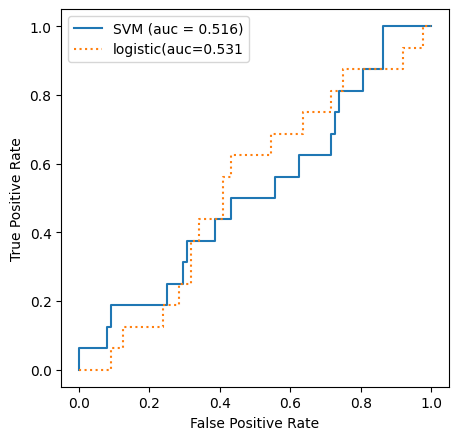

In [168]:
from matplotlib import figure
from sklearn.metrics import roc_curve,auc

logistic_fpr,logistic_tpr,threshold=roc_curve(Ytest,y_pred_logistic)
logistic_auc=auc(logistic_fpr,logistic_tpr)

svm_fpr,svm_tpr,threshold=roc_curve(Ytest,y_pred_svm)
svm_auc=auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr,svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % svm_auc)
plt.plot(logistic_fpr,logistic_tpr,linestyle=':',label='logistic(auc=%0.3f' % logistic_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


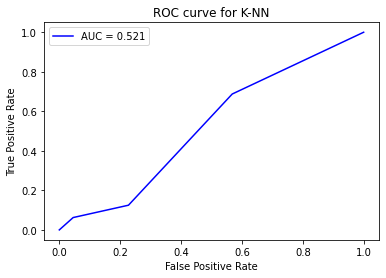

In [201]:
#roc for KNN
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
x=model.fit(Xtrain, Ytrain)

from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_score=model.predict_proba(Xtest) 
              #cross_val_score(model, X, Y, cv=76)
knn_fpr, knn_tpr, threshold = roc_curve(Ytest, y_score[:,1])
knn_auc = auc(knn_fpr, knn_tpr)

plt.title('ROC curve for K-NN')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'AUC = %0.3f' % knn_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

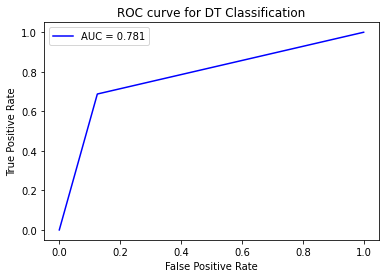

In [192]:
#roc curve for dt classification
from sklearn import tree
model=tree.DecisionTreeClassifier()
x=model.fit(Xtrain, Ytrain)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import metrics
y_preds_dt=model.predict_proba(Xtest)
dt_fpr, dt_tpr, threshold = metrics.roc_curve(Ytest, y_preds_dt[:,1])
dt_auc = metrics.auc(dt_fpr,dt_tpr)

plt.title('ROC curve for DT Classification')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'AUC = %0.3f' % dt_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()



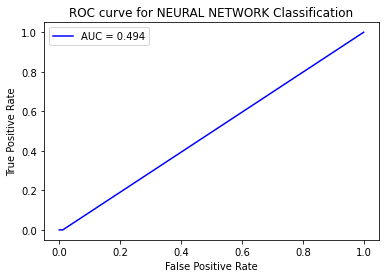

In [177]:
#roc curve for NN classification
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
x=model.fit(Xtrain, Ytrain)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import metrics
y_preds_nn=model.predict_proba(Xtest)
nn_fpr, nn_tpr, threshold = metrics.roc_curve(Ytest, y_preds_nn[:,1])
nn_auc = metrics.auc(nn_fpr,nn_tpr)

plt.title('ROC curve for NEURAL NETWORK Classification')
plt.plot(nn_fpr, nn_tpr, 'b', label = 'AUC = %0.3f' % nn_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()




In [ ]:
#SGD classification
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()    #loss="hinge", penalty="l2", max_iter=5)
model.fit(Xtrain,Ytrain)
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
y_pred_sgd= model.predict_proba(Xtest)   #model.decision_function(Ytest)
sgd_fpr, sgd_tpr, thresholds = metrics.roc_curve(Ytest,model)
sgd_auc = auc(sgd_fpr, sgd_tpr)

#var=[]
#for i in range(10):
 # h=ex
#  var.append(h)


plt.title('SGD Classification roc curve')
plt.plot(sgd_fpr, sgd_tpr, 'b', label='AUC = %0.3f' % sgd_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#roc for xg boost
from xgboost import XGBClassifier
model = XGBClassifier()
x=model.fit(Xtrain, Ytrain)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import metrics

y_preds_xg=model.predict_proba(Xtest)
#print(y_preds_xg[:,1])
a=y_preds_xg[:,1]
x='AUC = %0.2f' % a
print(x)
xg_fpr, xg_tpr, = metrics.roc_curve(Ytest, y_preds_xg[:,1])
xg_auc = metrics.auc(xg_fpr, xg_tpr)

plt.title('ROC curve for XG Boost')
plt.plot(xg_fpr, xg_tpr, 'b', label = 'AUC = %0.3f' % xg_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [ ]:
#roc curve for gaussian naive bayes 
from sklearn.naive_bayes import GaussianNB          
gnb = GaussianNB()
model=gnb.fit(Xtrain, Ytrain).predict(Xtest)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import metrics
y_preds_gn=model.predict_proba(Xtest)
gn_fpr, gn_tpr, threshold = metrics.roc_curve(Ytest, y_preds_gn[:,1])
nn_auc = metrics.auc(gn_fpr,gn_tpr)


plt.title('ROC curve for XG Boost')
plt.plot(gn_fpr, gn_tpr, 'b', label = 'AUC = %0.3f' % gn_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()



larger the area(auc) means a better model


0.9259259259259259
0.9612403100775194


ValueError: ignored

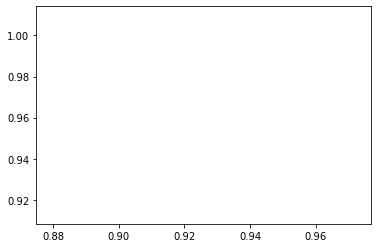

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
ada_fpr=(cm[1,0]/(cm[1,1]+cm[1,0]))
ada_tpr=(cm[0,0]/(cm[0,0]+cm[0,1]))
print(ada_fpr)
print(ada_tpr)

plt.plot(ada_fpr,ada_tpr,'b')#,label="AUC =%0.3f"% ada_auc)
pred_ada = model.predict_proba(Xtest)
ada_fpr,ada_tpr,thershold=roc_curve(Ytest,pred_ada)
#ada_auc=auc(ada_fpr,ada_tpr)
plt.plot(ada_fpr,ada_tpr,'b')#,label="AUC =%0.3f"% ada_auc)

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(Xtrain,Ytrain)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(Xtrain, Ytrain)
pred = clf.predict(Xtest)
pred_prob = clf.predict_proba(Xtest)
fpr = {}
tpr = {}
thresh ={}


for i in range(len(data)): 
  fpr[i], tpr[i], thresh[i] = roc_curve(Ytest, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
#plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


IndexError: ignored